In [1]:
import tifffile as tiff
import numpy as np
import os

# Directory where your individual TIFF images are located
image_folder = 'data\labels'

# List all TIFF files in the folder
tiff_images = sorted([f for f in os.listdir(image_folder) if f.endswith('.tif')])

# Load the TIFF images and stack them into a 3D NumPy array (volume)
volume_stack = []
for image_name in tiff_images:
    image_path = os.path.join(image_folder, image_name)
    image = tiff.imread(image_path)
    volume_stack.append(image)

# Convert the list of images to a NumPy array (3D array)
tiff_volume = np.stack(volume_stack, axis=0)

# Save the stacked volume as a multi-page TIFF
output_path = 'outputs/output_volume.tif'
tiff.imwrite(output_path, tiff_volume)

print(f'Multi-page TIFF volume saved as {output_path}')


Multi-page TIFF volume saved as outputs/output_volume.tif


c:\Users\nerea\anaconda3\envs\SCenv\Lib\site-packages\pyvista\jupyter\notebook.py:37: UserWarning: Failed to use notebook backend: 

cannot import name 'vuetify' from 'trame.widgets' (c:\Users\nerea\anaconda3\envs\SCenv\Lib\site-packages\trame\widgets\__init__.py)

Falling back to a static output.
  warnings.warn(


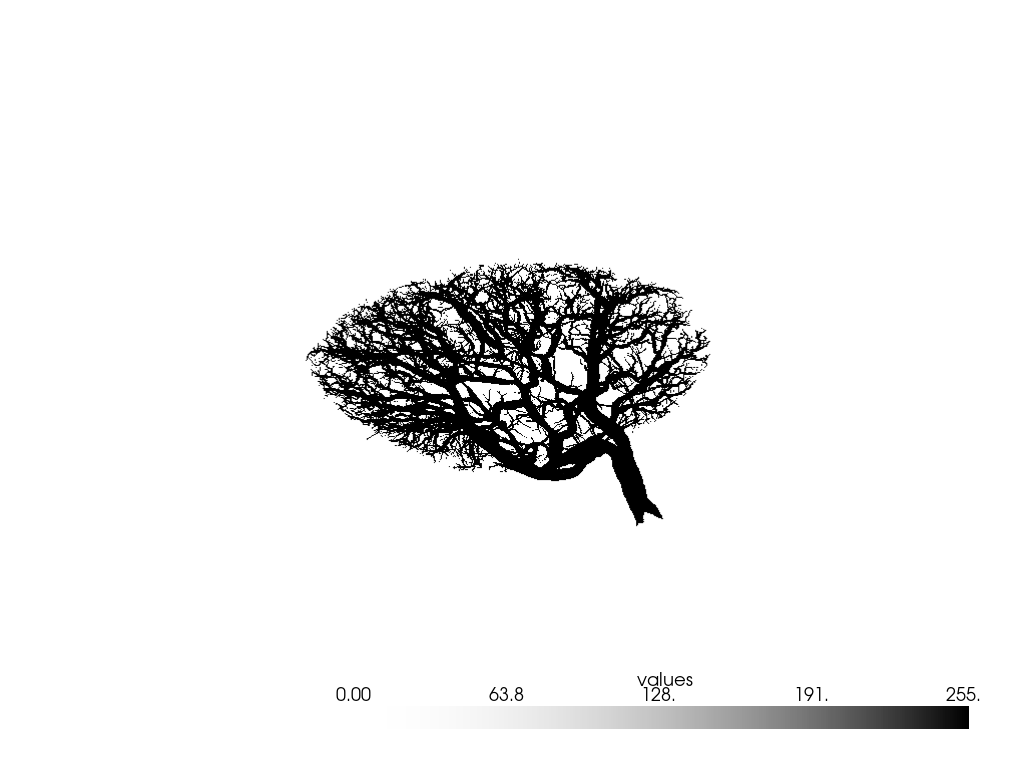

In [2]:
import pyvista as pv
import tifffile as tiff

# Create a pyvista plotter object
plotter = pv.Plotter()

# Add the volume data to the plotter
plotter.add_volume(tiff_volume, cmap="binary")

# Display the plot
plotter.show()